In [1]:
import numpy as np
import tensorflow.compat.v1 as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow import keras

In [2]:
# 定义RNN参数
HIDDEN_SIZE = 30                            # LSTM中隐藏节点的个数。
NUM_LAYERS = 2                              # Deep_LSTM的层数。
TIMESTEPS = 10                              # 循环神经网络的训练序列长度。
TRAINING_STEPS = 10000                      # 训练轮数。
BATCH_SIZE = 32                             # batch大小。
TRAINING_EXAMPLES = 10000                   # 训练数据个数。
TESTING_EXAMPLES = 1000                     # 测试数据个数。
SAMPLE_GAP = 0.01                           # 采样间隔。

In [3]:
# 正弦函数采样
def generate_data(seq):
    X = []
    y = []
    # 序列的第i项和后面的TIMESTEPS-1项合在一起作为输入；第i + TIMESTEPS项作为输
    # 出。即用sin函数前面的TIMESTEPS个点的信息，预测第i + TIMESTEPS个点的函数值。
    for i in range(len(seq) - TIMESTEPS):
        X.append([seq[i: i + TIMESTEPS]])
        y.append([seq[i + TIMESTEPS]])
    return np.array(X, dtype=np.float32), np.array(y, dtype=np.float32)

In [4]:
test_start = (TRAINING_EXAMPLES + TIMESTEPS) * SAMPLE_GAP
test_end = test_start + (TESTING_EXAMPLES + TIMESTEPS) * SAMPLE_GAP
train_X, train_y = generate_data(np.sin(np.linspace(
    0, test_start, TRAINING_EXAMPLES + TIMESTEPS, dtype=np.float32)))
test_X, test_y = generate_data(np.sin(np.linspace(
    test_start, test_end, TESTING_EXAMPLES + TIMESTEPS, dtype=np.float32)))

In [5]:
inputs=keras.Input(shape=(1,TIMESTEPS))
cell = tf.nn.rnn_cell.MultiRNNCell([
    tf.nn.rnn_cell.BasicLSTMCell(HIDDEN_SIZE)
    for _ in range(NUM_LAYERS)])
output= layers.RNN(cell)(inputs)
predictions=layers.Dense(1,activation=None)(output)
model=keras.Model(inputs=inputs, outputs=predictions,name="DeepRNN_model")


Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
This class is equivalent as tf.keras.layers.StackedRNNCells, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [6]:
model.summary()


Model: "DeepRNN_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1, 10)]           0         
_________________________________________________________________
rnn (RNN)                    (None, 30)                12240     
_________________________________________________________________
dense (Dense)                (None, 1)                 31        
Total params: 12,271
Trainable params: 12,271
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(
    loss=keras.losses.MeanSquaredError(),
    optimizer=keras.optimizers.Adagrad(learning_rate=0.1),
    metrics=["acc"]
)


In [8]:
model.fit(train_X, train_y,batch_size=BATCH_SIZE,epochs=5)


Train on 10000 samples
Epoch 1/5
10000/10000 [==============================] - 3s 338us/sample - loss: 0.0263 - acc: 0.0000e+00
Epoch 2/5
10000/10000 [==============================] - 1s 140us/sample - loss: 0.0025 - acc: 0.0000e+00
Epoch 3/5
10000/10000 [==============================] - 1s 141us/sample - loss: 0.0016 - acc: 0.0000e+00
Epoch 4/5
10000/10000 [==============================] - 1s 138us/sample - loss: 0.0011 - acc: 0.0000e+00
Epoch 5/5
10000/10000 [==============================] - 1s 133us/sample - loss: 7.3783e-04 - acc: 0.0000e+00


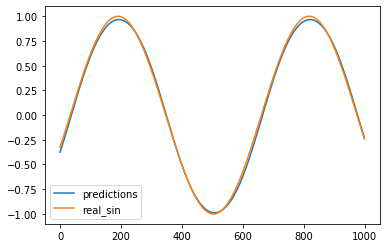

In [9]:
plt.figure()
plt.plot(model.predict(test_X), label='predictions')
plt.plot(test_y, label='real_sin')
plt.legend()
plt.show()
